### Problem Statement:

**Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.**

**Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.**

**Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.**

### Import Required Library

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scikitplot as skplt
from imblearn.over_sampling import SMOTE
pd.set_option('display.max_columns', None) # For display maximum columns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Rading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\csv file\Telecom_customer_churn.csv", na_values = [" "])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (7043, 21)


### Checking for Null values

In [4]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



#### There is null value

### Fill NaN

In [5]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)

In [6]:
print('================================\n')
print(df.isnull().sum())
print('\n================================')


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



#### Nan are removed

### Information about dataset

In [6]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 

#### Categorical data present in our data set

### Drop unwanted column

In [7]:
df = df.drop('customerID', axis = 1)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


#### We drop the customerID column

### Analysis of Data with respact to Churn

### Gender column

In [8]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [9]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

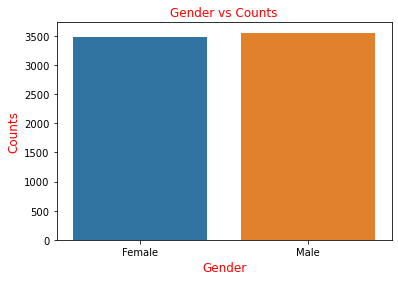

In [19]:
sns.countplot( x="gender", data=df)
plt.xlabel('Gender', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12)
plt.title('Gender vs Counts', c = 'r', fontsize = 12)
plt.show()

#### Male is highest in number

In [21]:
gn = df.groupby('gender')['Churn'].value_counts()
gn

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

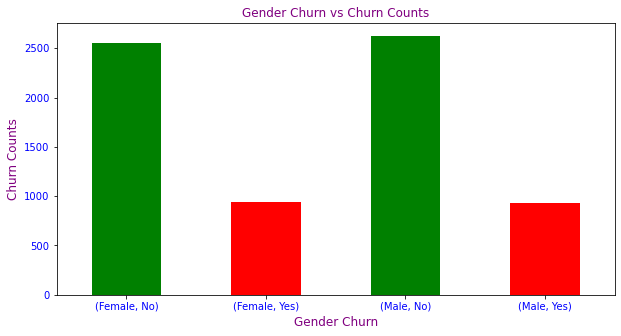

In [24]:
gn.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Gender Churn', c = 'purple', fontsize = 12)
plt.ylabel('Churn Counts', c = 'purple', fontsize = 12 )
plt.title('Gender Churn vs Churn Counts', c = 'purple', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Female has highest no of churn

### Senior Citizen column

In [25]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

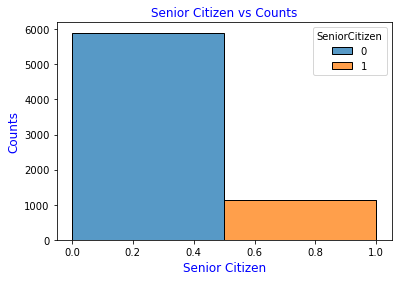

In [26]:
sns.histplot(binwidth=0.5, x="SeniorCitizen", hue="SeniorCitizen", data=df, stat="count", multiple="stack")
plt.xlabel('Senior Citizen', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Senior Citizen vs Counts', c = 'b', fontsize = 12)
plt.show()

In [27]:
sc = df.groupby('SeniorCitizen')['Churn'].value_counts()
sc

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

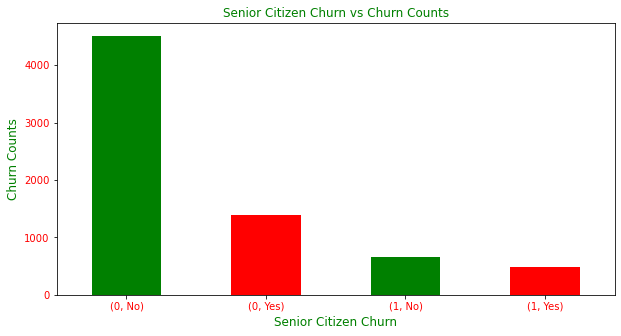

In [28]:
sc.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Senior Citizen Churn', c = 'g', fontsize = 12)
plt.ylabel('Churn Counts', c = 'g', fontsize = 12 )
plt.title('Senior Citizen Churn vs Churn Counts', c = 'g', fontsize = 12)
plt.xticks(c = 'r')
plt.yticks(c = 'r')
plt.show()

#### In Senior Citizen highest no of Not Churn 👍

### Partner column

In [29]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

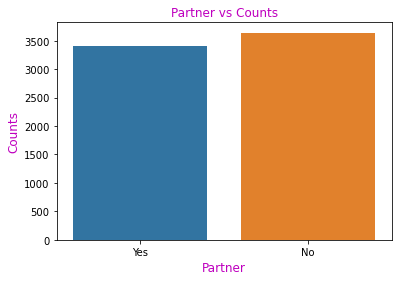

In [31]:
sns.countplot( x="Partner", data=df)
plt.xlabel('Partner', c = 'm', fontsize = 12)
plt.ylabel('Counts', c = 'm', fontsize = 12)
plt.title('Partner vs Counts', c = 'm', fontsize = 12)
plt.show()

#### Person has No Partner count is high

In [33]:
p = df.groupby('Partner')['Churn'].value_counts()
p

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: Churn, dtype: int64

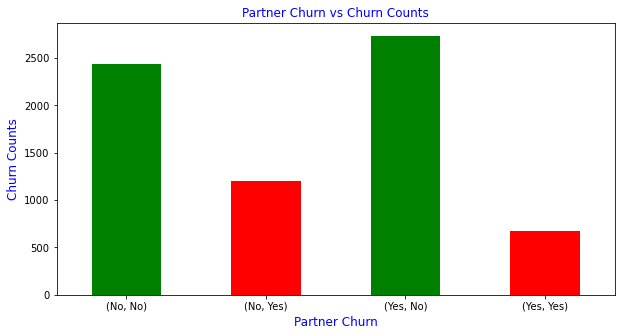

In [35]:
p.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Partner Churn', c = 'b', fontsize = 12)
plt.ylabel('Churn Counts', c = 'b', fontsize = 12 )
plt.title('Partner Churn vs Churn Counts', c = 'b', fontsize = 12)
plt.xticks(c = 'k')
plt.yticks(c = 'k')
plt.show()

#### Person which has Partner no of Churn is high 👍

### Dependents column

In [36]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

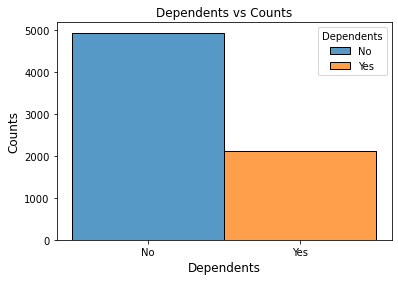

In [37]:
sns.histplot(binwidth=0.5, x="Dependents", hue="Dependents", data=df, stat="count", multiple="stack")
plt.xlabel('Dependents', c = 'k', fontsize = 12)
plt.ylabel('Counts', c = 'k', fontsize = 12)
plt.title('Dependents vs Counts', c = 'k', fontsize = 12)
plt.show()

In [38]:
d = df.groupby('Dependents')['Churn'].value_counts()
d

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1784
            Yes       326
Name: Churn, dtype: int64

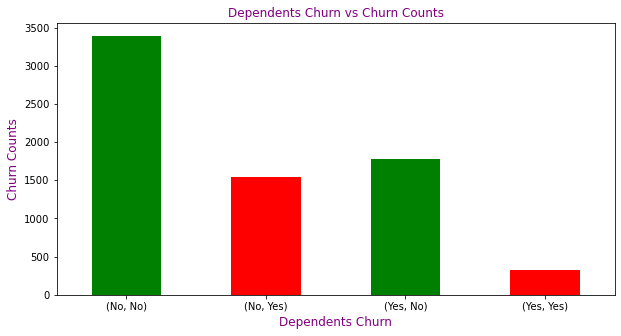

In [40]:
d.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Dependents Churn', c = 'purple', fontsize = 12)
plt.ylabel('Churn Counts', c = 'purple', fontsize = 12 )
plt.title('Dependents Churn vs Churn Counts', c = 'purple', fontsize = 12)
plt.xticks(c = 'k')
plt.yticks(c = 'k')
plt.show()

#### Dependents person no of Churn is low 

### Tenure column

In [42]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [57]:
tn = df.groupby('tenure')['Churn'].value_counts().sort_values()
tn

tenure  Churn
63      Yes        4
64      Yes        4
62      Yes        5
72      Yes        6
45      Yes        6
                ... 
2       Yes      123
71      No       164
1       No       233
72      No       356
1       Yes      380
Name: Churn, Length: 145, dtype: int64

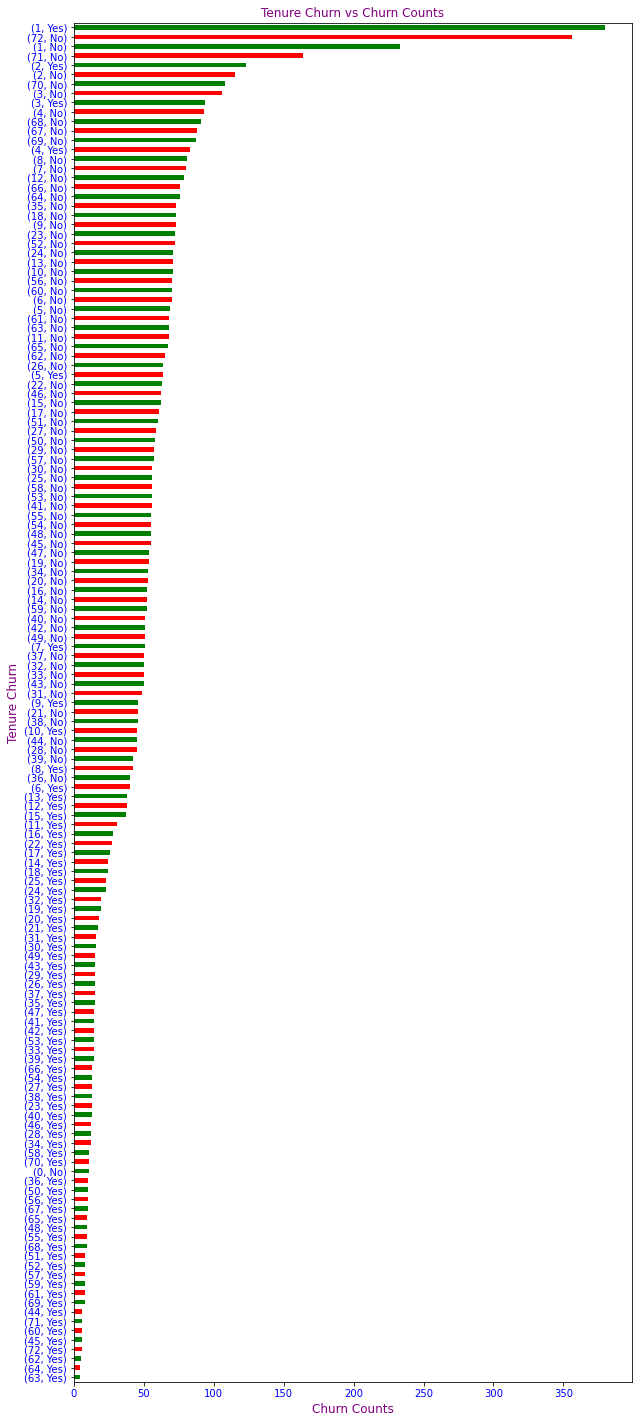

In [58]:
tn.plot.barh(figsize = (10,25), color = ['g','r'])
plt.ylabel('Tenure Churn', c = 'purple', fontsize = 12)
plt.xlabel('Churn Counts', c = 'purple', fontsize = 12 )
plt.title('Tenure Churn vs Churn Counts', c = 'purple', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Person has year tenure has highest churn

### Phone Service column 

In [59]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

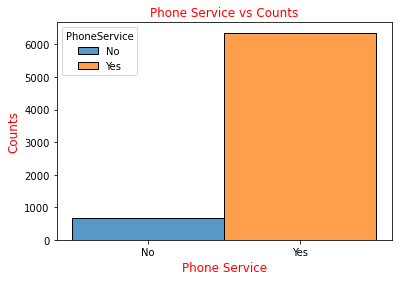

In [62]:
sns.histplot(binwidth=0.5, x="PhoneService", hue="PhoneService", data=df, stat="count", multiple="stack")
plt.xlabel('Phone Service', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12)
plt.title('Phone Service vs Counts', c = 'r', fontsize = 12)
plt.show()

#### A person has Phone Service highest counts 👍

In [63]:
ps = df.groupby('PhoneService')['Churn'].value_counts()
ps

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

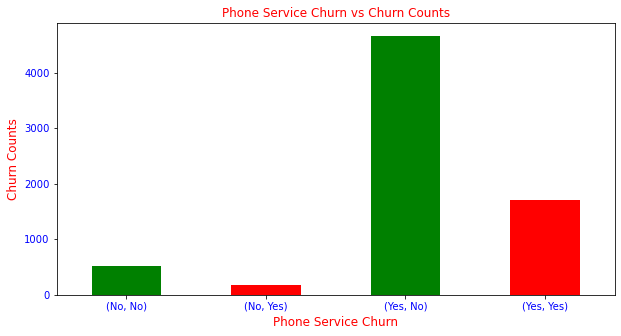

In [64]:
ps.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Phone Service Churn', c = 'r', fontsize = 12)
plt.ylabel('Churn Counts', c = 'r', fontsize = 12 )
plt.title('Phone Service Churn vs Churn Counts', c = 'r', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Person has Phone Service no of churn is low 👍

### Multiple Lines column

In [66]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

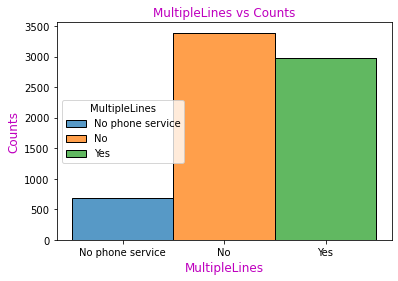

In [67]:
sns.histplot(binwidth=0.5, x="MultipleLines", hue="MultipleLines", data=df, stat="count", multiple="stack")
plt.xlabel('MultipleLines', c= 'm', fontsize = 12)
plt.ylabel('Counts', c = 'm', fontsize = 12)
plt.title('MultipleLines vs Counts', c = 'm', fontsize = 12)
plt.show()

#### Person has no phone service count is highest

In [68]:
ml = df.groupby('MultipleLines')['Churn'].value_counts()
ml

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

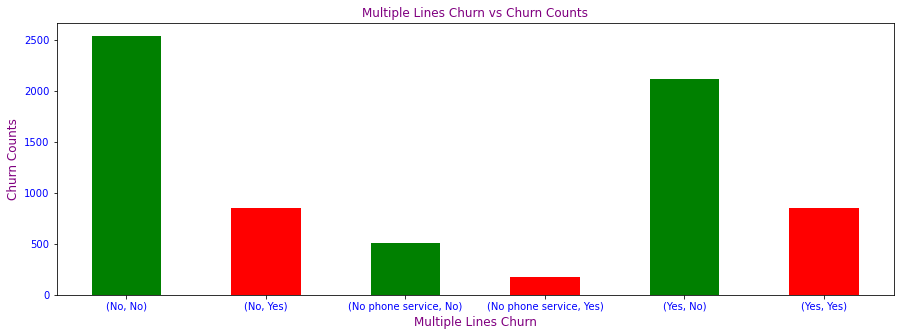

In [70]:
ml.plot.bar(figsize = (15,5), rot = 360, color = ['g','r'])
plt.xlabel('Multiple Lines Churn', c = 'purple', fontsize = 12)
plt.ylabel('Churn Counts', c = 'purple', fontsize = 12 )
plt.title('Multiple Lines Churn vs Churn Counts', c = 'purple', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### A person has Multiple Lines no of churn is low 👍

In [71]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

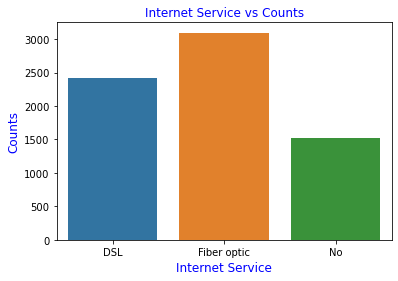

In [72]:
sns.countplot( x="InternetService", data=df)
plt.xlabel('Internet Service', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Internet Service vs Counts', c = 'b', fontsize = 12)
plt.show()

#### Fiber optic Internet Service count is highest 👍

In [73]:
ins = df.groupby('InternetService')['Churn'].value_counts()
ins

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64

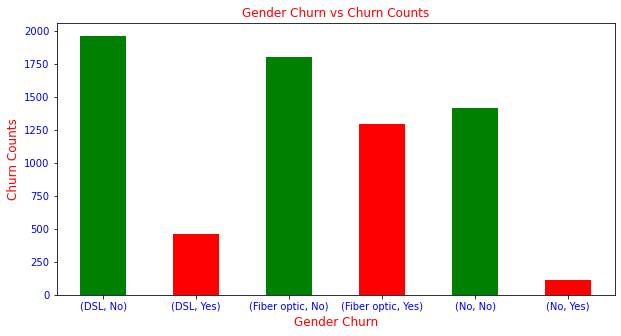

In [74]:
ins.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Gender Churn', c = 'r', fontsize = 12)
plt.ylabel('Churn Counts', c = 'r', fontsize = 12 )
plt.title('Gender Churn vs Churn Counts', c = 'r', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### In fiber optic Internet Service has no of churn is low 👍

### Online Security column

In [75]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

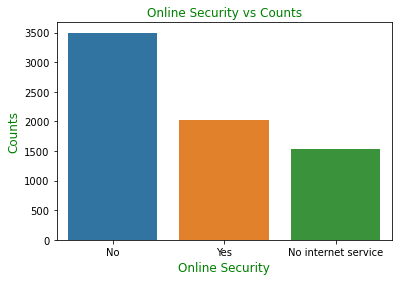

In [76]:
sns.countplot( x="OnlineSecurity", data=df)
plt.xlabel('Online Security', c = 'g', fontsize = 12)
plt.ylabel('Counts', c = 'g', fontsize = 12)
plt.title('Online Security vs Counts', c = 'g', fontsize = 12)
plt.show()

#### A person has no online security count has highest

In [77]:
os = df.groupby('OnlineSecurity')['Churn'].value_counts()
os

OnlineSecurity       Churn
No                   No       2037
                     Yes      1461
No internet service  No       1413
                     Yes       113
Yes                  No       1724
                     Yes       295
Name: Churn, dtype: int64

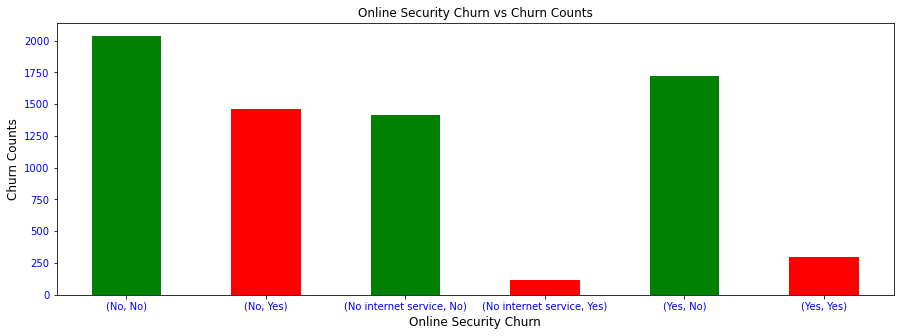

In [80]:
os.plot.bar(figsize = (15,5), rot = 360, color = ['g','r'])
plt.xlabel('Online Security Churn', c = 'k', fontsize = 12)
plt.ylabel('Churn Counts', c = 'k', fontsize = 12 )
plt.title('Online Security Churn vs Churn Counts', c = 'k', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### A person has no online security has highest no of churn

### Online Backup column

In [82]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

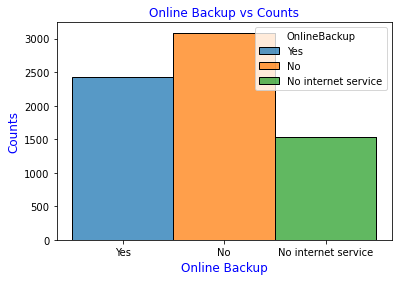

In [83]:
sns.histplot(binwidth=0.5, x="OnlineBackup", hue="OnlineBackup", data=df, stat="count", multiple="stack")
plt.xlabel('Online Backup', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Online Backup vs Counts', c = 'b', fontsize = 12)
plt.show()

#### A person has No Online Backup counts is highest

### Device Protection

In [84]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

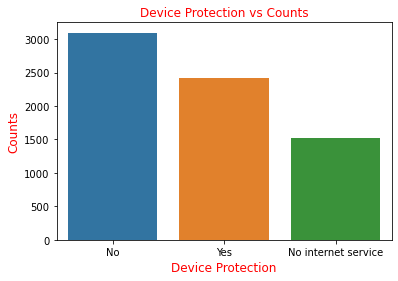

In [85]:
sns.countplot(x = "DeviceProtection", data=df)
plt.xlabel('Device Protection', c = 'r', fontsize = 12)
plt.ylabel('Counts', c = 'r', fontsize = 12)
plt.title('Device Protection vs Counts', c = 'r', fontsize = 12)
plt.show()

#### A person has No Device Protection counts is highest

### Tech Support

In [86]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

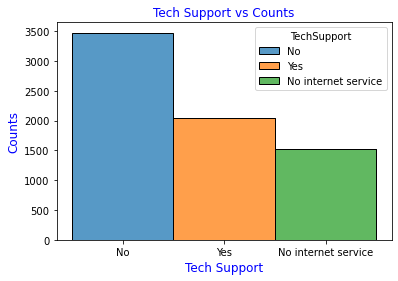

In [87]:
sns.histplot(binwidth=0.5, x="TechSupport", hue="TechSupport", data=df, stat="count", multiple="stack")
plt.xlabel('Tech Support', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Tech Support vs Counts', c = 'b', fontsize = 12)
plt.show()

#### A person has No Tech Support counts is highest

### Streaming TV column

In [88]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

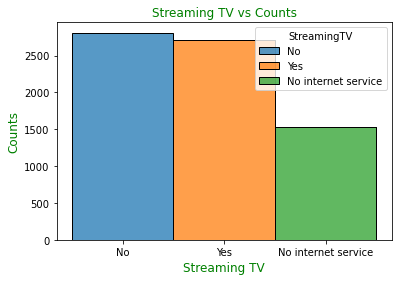

In [89]:
sns.histplot(binwidth=0.5, x="StreamingTV", hue="StreamingTV", data=df, stat="count", multiple="stack")
plt.xlabel('Streaming TV', c = 'g', fontsize = 12)
plt.ylabel('Counts', c = 'g', fontsize = 12)
plt.title('Streaming TV vs Counts', c = 'g', fontsize = 12)
plt.show()

#### A person has Not Streaming TV live counts is highest count

### Streaming Movies column

In [91]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

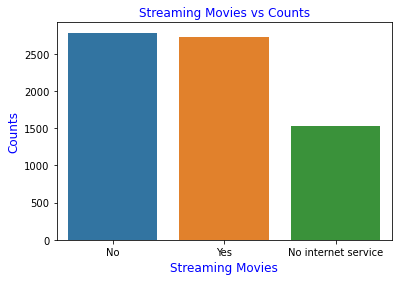

In [92]:
sns.countplot(x="StreamingMovies", data=df)
plt.xlabel('Streaming Movies', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Streaming Movies vs Counts', c = 'b', fontsize = 12)
plt.show()

#### A person has Not Streaming Movies is highest count

### Contract columns

In [93]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

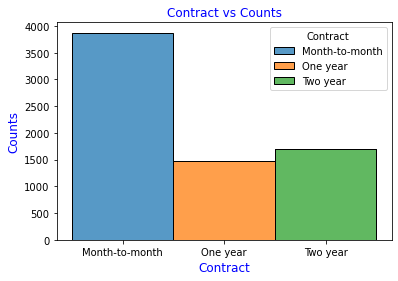

In [94]:
sns.histplot(binwidth=0.5, x="Contract", hue="Contract", data=df, stat="count", multiple="stack")
plt.xlabel('Contract', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Contract vs Counts', c = 'b', fontsize = 12)
plt.show()

#### A person has Month to month contract counts is highest

### Paperless Billing column

In [95]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

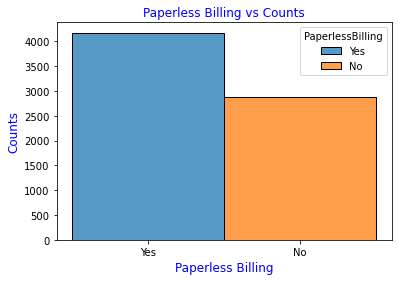

In [96]:
sns.histplot(binwidth=0.5, x="PaperlessBilling", hue="PaperlessBilling", data=df, stat="count", multiple="stack")
plt.xlabel('Paperless Billing', c = 'b', fontsize = 12)
plt.ylabel('Counts', c = 'b', fontsize = 12)
plt.title('Paperless Billing vs Counts', c = 'b', fontsize = 12)
plt.show()

In [97]:
pb = df.groupby('PaperlessBilling')['Churn'].value_counts()
pb

PaperlessBilling  Churn
No                No       2403
                  Yes       469
Yes               No       2771
                  Yes      1400
Name: Churn, dtype: int64

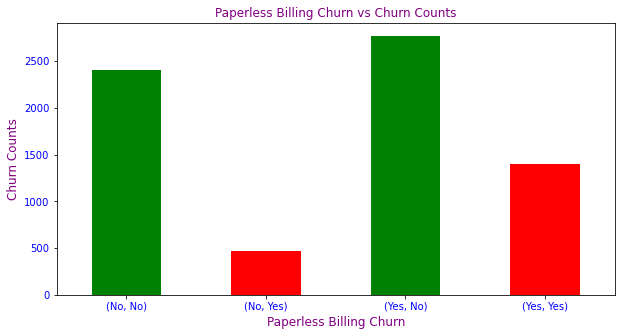

In [98]:
pb.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Paperless Billing Churn', c = 'purple', fontsize = 12)
plt.ylabel('Churn Counts', c = 'purple', fontsize = 12 )
plt.title('Paperless Billing Churn vs Churn Counts', c = 'purple', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### A person has Paperless Billing is lowest churn

### Payment Method column

In [105]:
pm = df['PaymentMethod'].value_counts()
pm

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

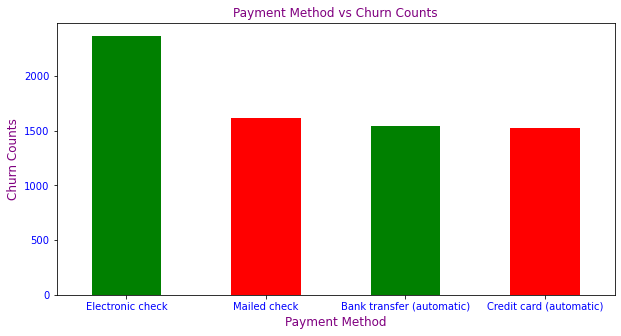

In [109]:
pm.plot.bar(figsize = (10,5), rot = 360, color = ['g','r'])
plt.xlabel('Payment Method', c = 'purple', fontsize = 12)
plt.ylabel('Churn Counts', c = 'purple', fontsize = 12 )
plt.title('Payment Method vs Churn Counts', c = 'purple', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### Electronic check payment method is highest

In [114]:
pmg = df.groupby('PaymentMethod')['Churn'].value_counts().sort_values()
pmg

PaymentMethod              Churn
Credit card (automatic)    Yes       232
Bank transfer (automatic)  Yes       258
Mailed check               Yes       308
Electronic check           Yes      1071
Bank transfer (automatic)  No       1286
Credit card (automatic)    No       1290
Electronic check           No       1294
Mailed check               No       1304
Name: Churn, dtype: int64

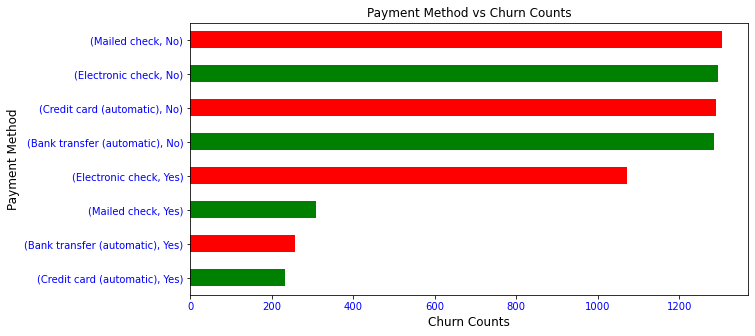

In [115]:
pmg.plot.barh(figsize = (10,5), rot = 360, color = ['g','r'])
plt.ylabel('Payment Method', c = 'k', fontsize = 12)
plt.xlabel('Churn Counts', c = 'k', fontsize = 12 )
plt.title('Payment Method vs Churn Counts', c = 'k', fontsize = 12)
plt.xticks(c = 'b')
plt.yticks(c = 'b')
plt.show()

#### A person has No mailed check counts is highest churn

### Monthly Charges column

In [119]:
df['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64

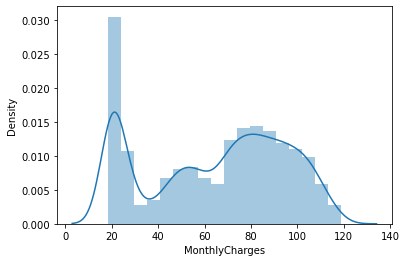

In [133]:
sns.distplot(df['MonthlyCharges'])
plt.show()

#### Above plot normaly distributed

### Total Charges column

In [141]:
df['TotalCharges'].value_counts()

2283.300441    11
20.200000      11
19.750000       9
19.650000       8
19.900000       8
               ..
1474.350000     1
6668.350000     1
6096.900000     1
140.700000      1
5867.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

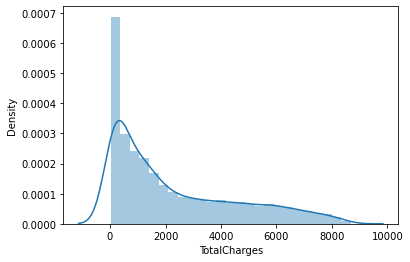

In [142]:
sns.distplot(df['TotalCharges'])
plt.show()

#### Above plot is skewed

### Encoding Categorical Column

In [8]:
oe = OrdinalEncoder()

In [9]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0


In [10]:
print('==================================================\n')
print(df.info())
print('====================================================')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64

### Data distribution

---------------------
Distribution Plot :- 
---------------------


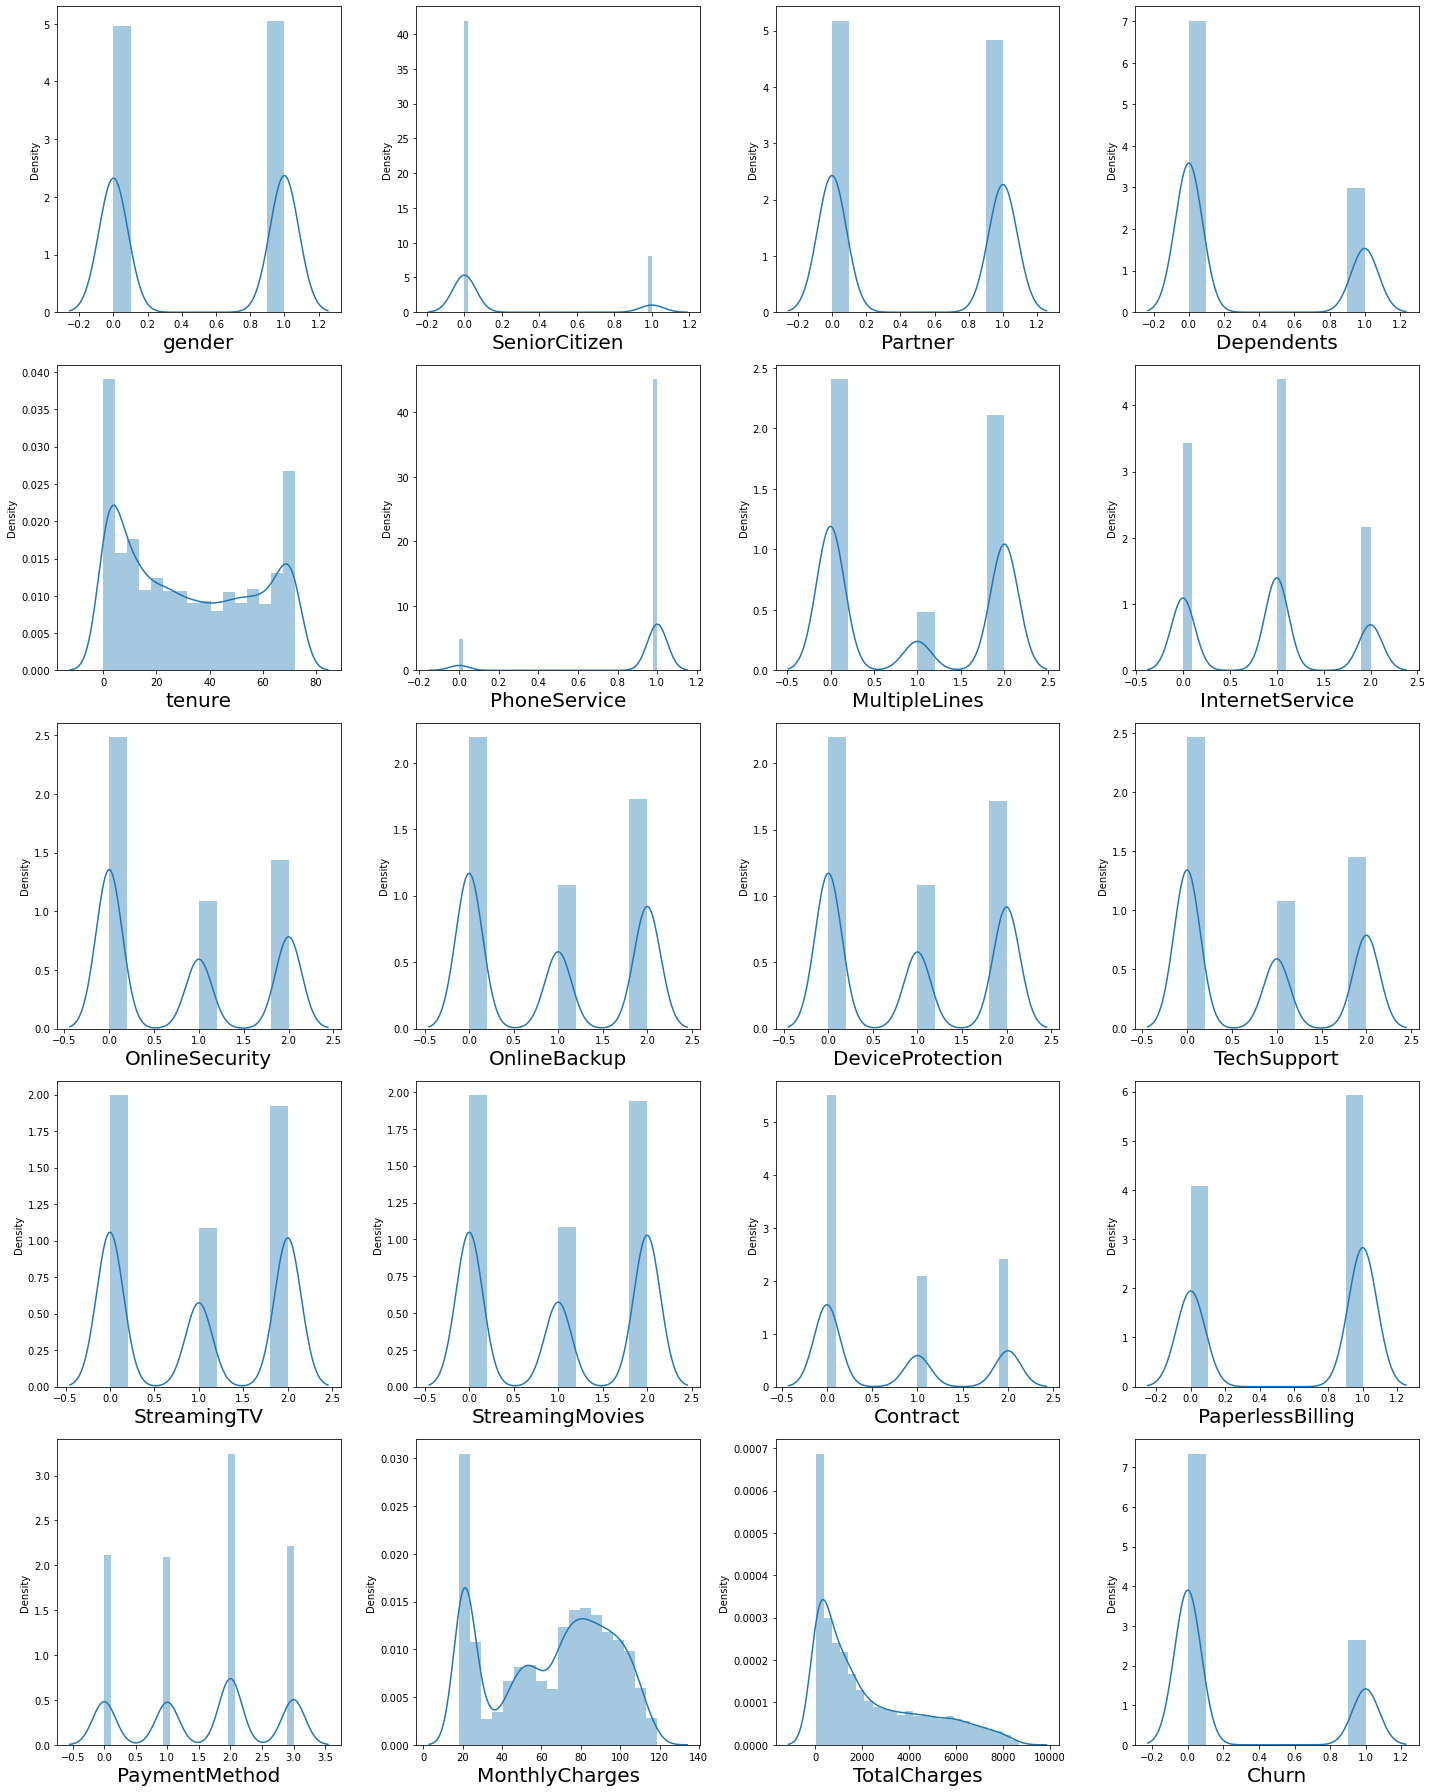

In [149]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(5,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Some columns are little skewed

### Check skweness

In [150]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

#### Skewness present in our dataset 

### Corelation of Feature vs Label using Heat map

-----------
Heat Map :-
-----------


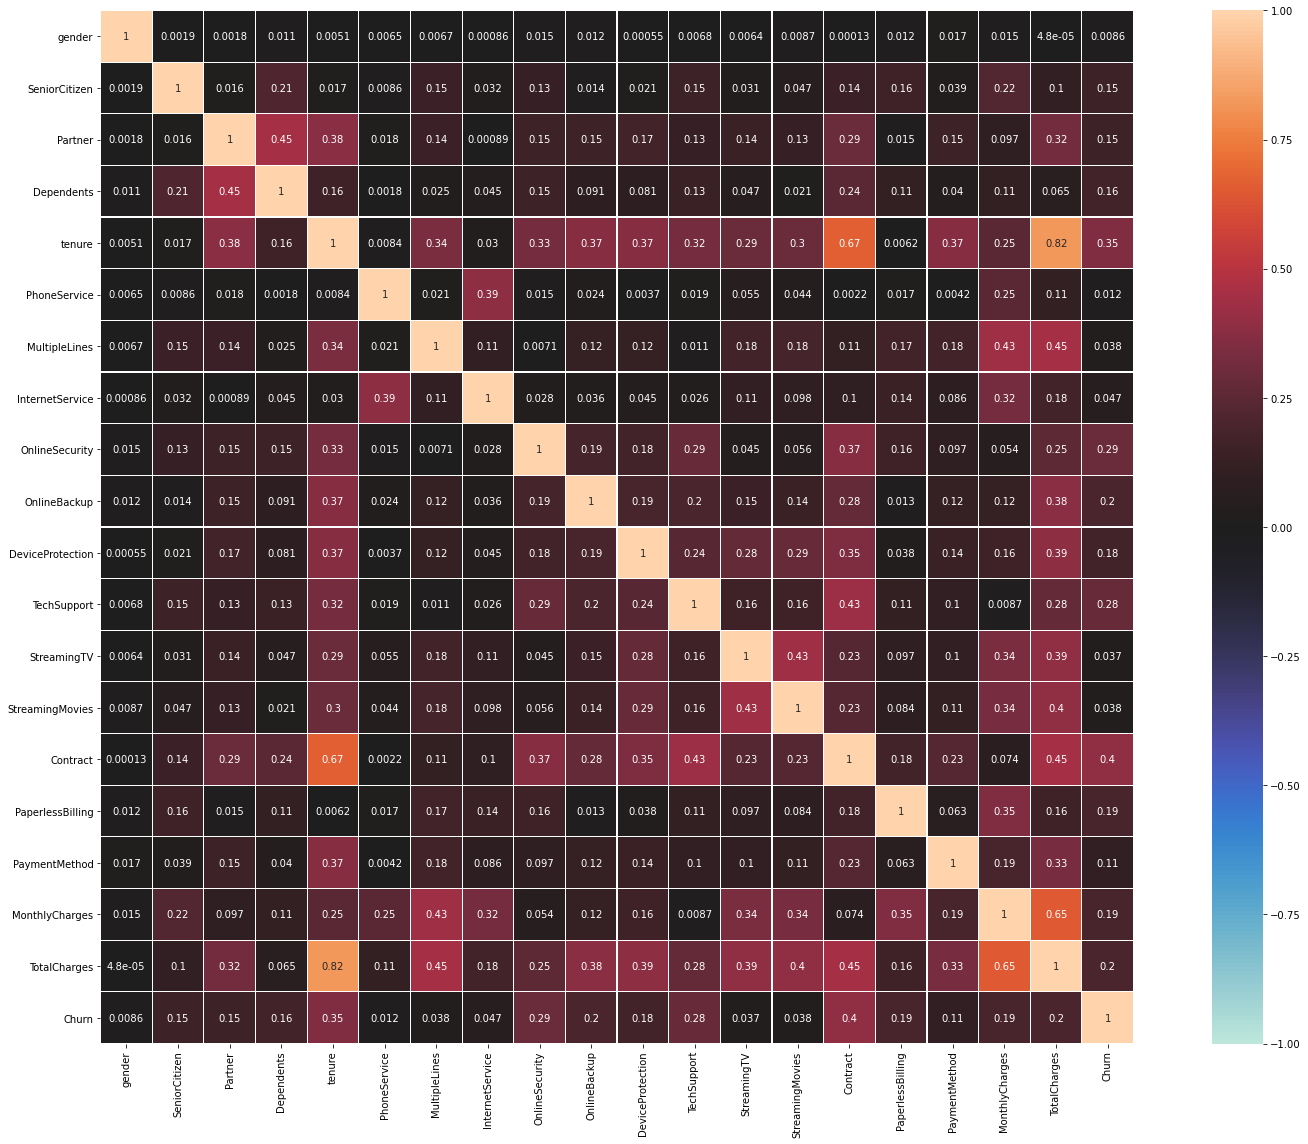

In [152]:
print('-----------')
print('Heat Map :-')
print('-----------')
df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

#### Total charges has highest corelation with label

### Spliting Dataset into features and label

In [11]:
x = df.drop('Churn', axis = 1)
y = df. Churn
print('Data has been splited')

Data has been splited


-----------------
Scatter Plot :-
-----------------


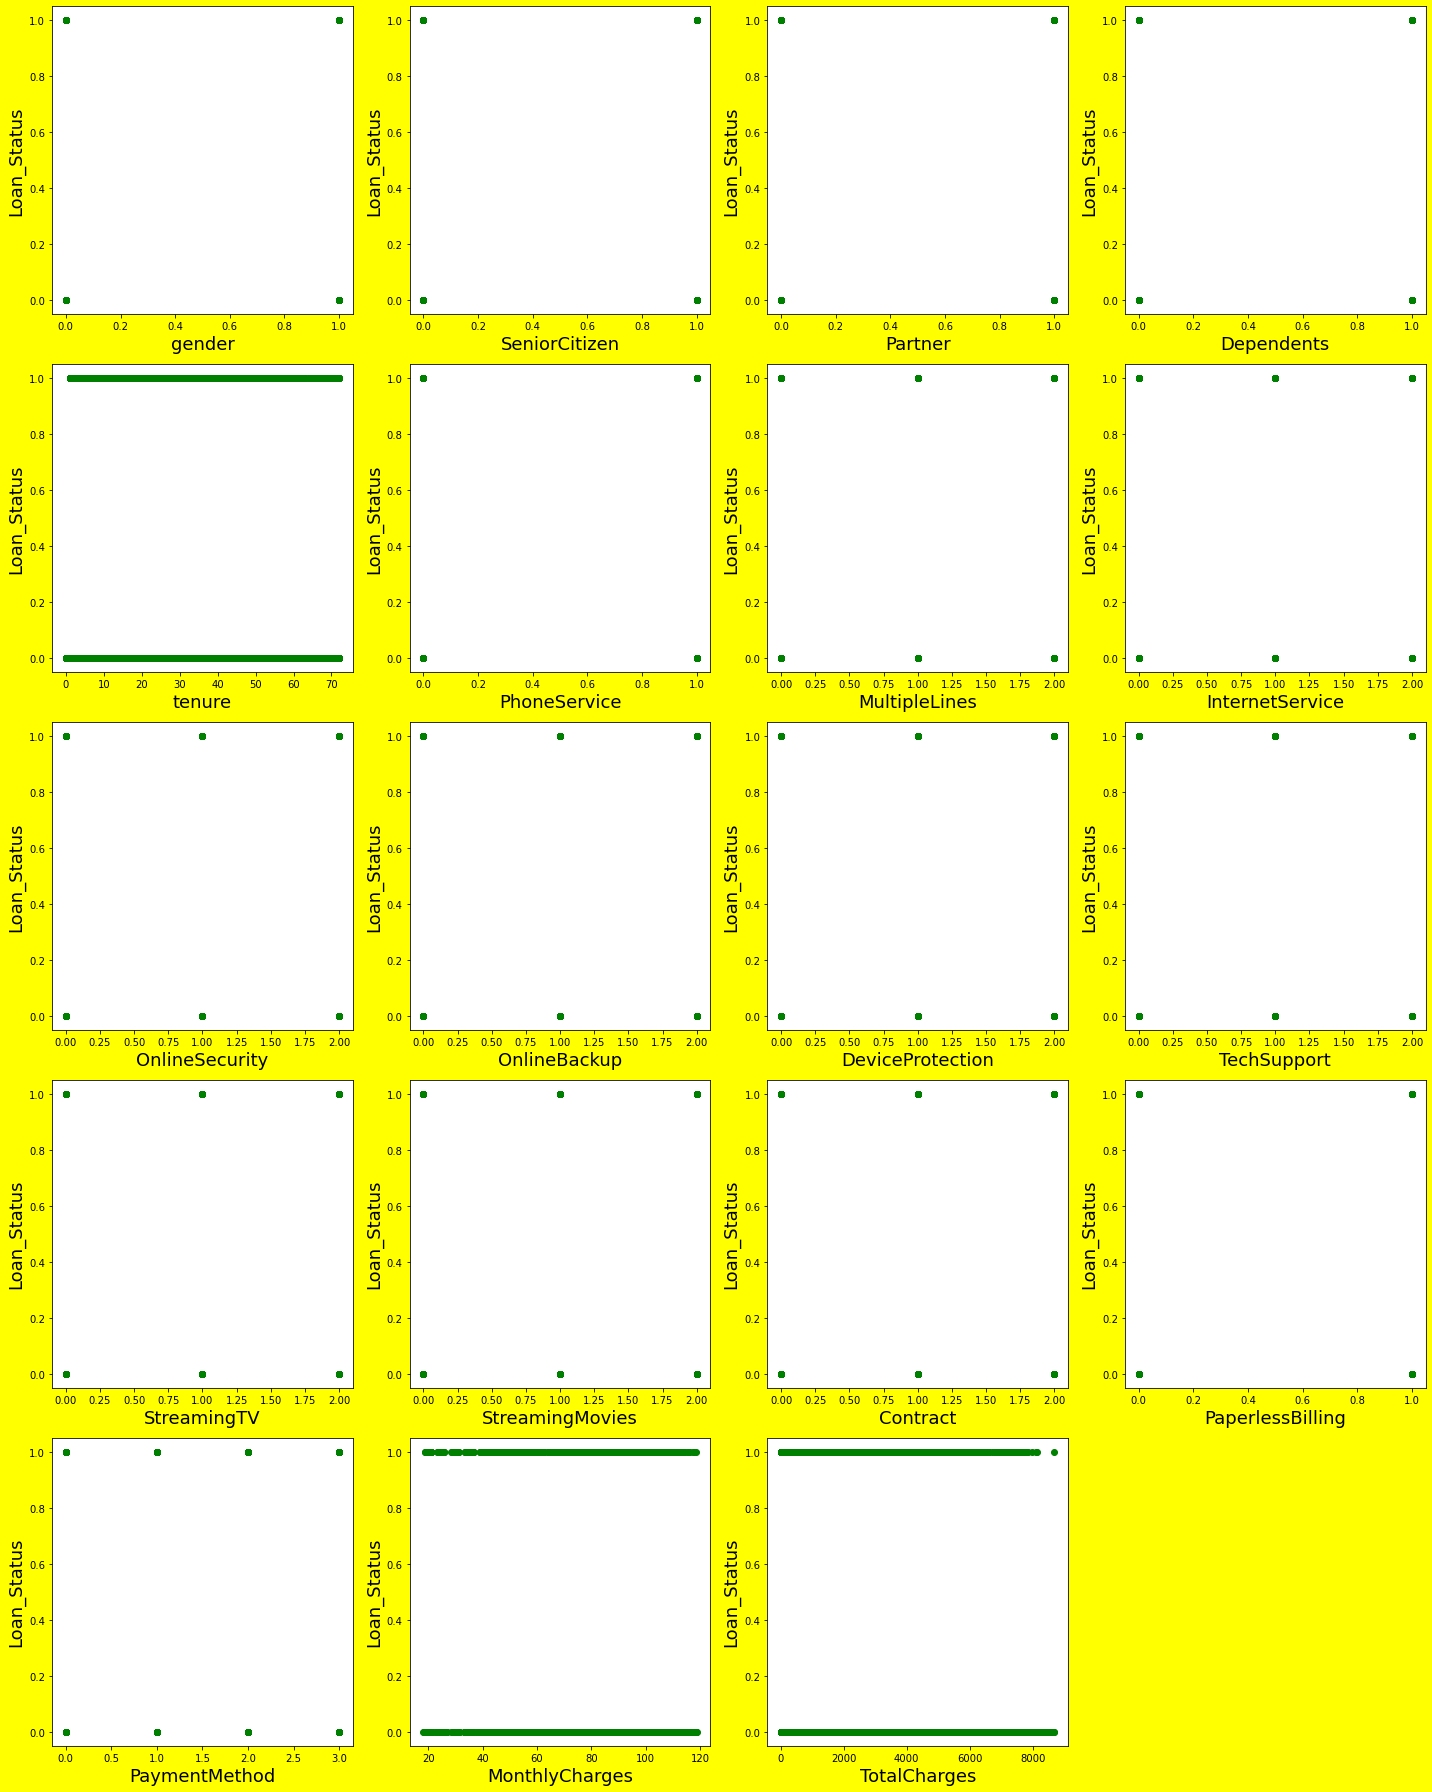

In [156]:
# Let' see relation between features and label.
print('-----------------')
print('Scatter Plot :-')
print('-----------------')

plt.figure(figsize = (20,25), facecolor = 'yellow')
plotnumber = 1
for column in x:
    if plotnumber <=20:
        ax = plt.subplot(5,4, plotnumber)
        plt.scatter(x[column],y, c = 'g')
        plt.xlabel(column, fontsize = 18)
        plt.ylabel('Loan_Status', fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### Positive relation in feature and label

### Checking for class imbalance

In [12]:
df['Churn'].value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

### Handling Class Imbalance

In [13]:
sm = SMOTE()
x_over, y_over = sm.fit_resample(x,y)

In [14]:
print('---------------------')
print('Class are balanced :-')
print('---------------------')
print(y_over.value_counts())
print('---------------------')

---------------------
Class are balanced :-
---------------------
0.0    5174
1.0    5174
Name: Churn, dtype: int64
---------------------


### Data Scaling

In [57]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.        , 0.        , 1.        , ..., 0.66666667, 0.11542289,
        0.0012751 ],
       [1.        , 0.        , 0.        , ..., 1.        , 0.38507463,
        0.21586661],
       [1.        , 0.        , 0.        , ..., 1.        , 0.35422886,
        0.01031041],
       ...,
       [0.        , 0.        , 1.        , ..., 0.66666667, 0.11293532,
        0.03780868],
       [1.        , 1.        , 1.        , ..., 1.        , 0.55870647,
        0.03321025],
       [1.        , 0.        , 0.        , ..., 0.        , 0.86965174,
        0.78764136]])

### Split data into train and test. Model will be bulit on training data and tested on test data

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Bulding

### Decision Tree model instantiaing, training and evaluating

In [59]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [60]:
bag_dt.oob_score

True

In [61]:
bag_dt.fit(x_train, y_train)
print('Bagging DT score ------->', bag_dt.score(x_test, y_test))

Bagging DT score -------> 0.8465403942790878


In [62]:
y_pred = bag_dt.predict(x_test)

In [63]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1298
         1.0       0.86      0.82      0.84      1289

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587

------------------------------------------------------------



#### Conclusion : Decision Tree model has 85% score

### Cross Validation score to check if the model is overfitting

In [64]:
cv = cross_val_score(bag_dt, x, y, cv = 5)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.78730795131944


#### Conclusion : Decision Tree model has 78% Cross Validation score

### ROC, AUC Curve

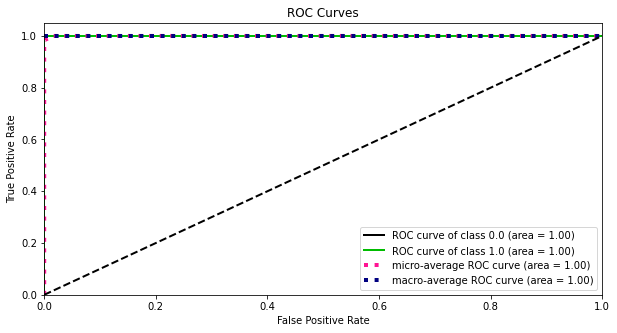

In [65]:
prob = bag_dt.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### XGBoost model instantiaing, training and evaluating

In [66]:
bag_xgb = BaggingClassifier(xgb.XGBClassifier(eval_metric = 'mlogloss'), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [67]:
bag_xgb.oob_score

True

In [68]:
bag_xgb.fit(x_train, y_train)
print('Bagging XGBoost score ------->', bag_xgb.score(x_test, y_test))

Bagging XGBoost score -------> 0.8612292230382682


In [69]:
y_pred = bag_xgb.predict(x_test)

In [70]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1298
         1.0       0.87      0.85      0.86      1289

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587

------------------------------------------------------------



#### Conclusion : XGBoost model has 86% score

### Cross Validation score to check if the model is overfitting

In [71]:
cv = cross_val_score(bag_xgb, x, y, cv = 5)
print('Cross Validation score of XGBoost model --->', cv.mean())

Cross Validation score of XGBoost model ---> 0.7968201577521131


#### Conclusion : XGBoost model has 79% Cross Validation score

### ROC, AUC Curve

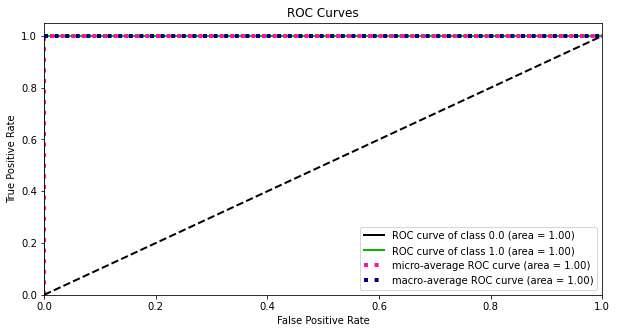

In [72]:
prob = bag_xgb.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Knn model instantiaing, training and evaluating

In [73]:
bag_Knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5), n_estimators = 30, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [74]:
bag_Knn.oob_score

True

In [75]:
bag_Knn.fit(x_train, y_train)
print('Bagging KNN score ------->', bag_Knn.score(x_test, y_test))

Bagging KNN score -------> 0.7529957479706223


In [76]:
y_pred = bag_dt.predict(x_test)

In [77]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      1298
         1.0       0.86      0.82      0.84      1289

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587

------------------------------------------------------------



#### Conclusion : KNN model has 85% score

### Cross Validation score to check if the model is overfitting

In [78]:
cv = cross_val_score(bag_Knn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.7826227700174205


#### Conclusion : Knn model has 78% Cross Validation score

### ROC, AUC Curve

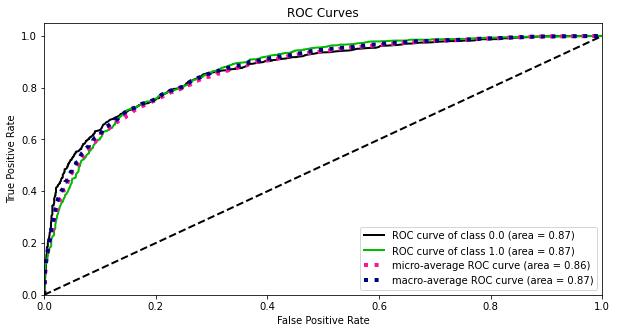

In [79]:
prob = bag_Knn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Random Forest model instantiaing, training and evaluating

In [90]:
bag_Rn = BaggingClassifier(RandomForestClassifier(), n_estimators = 10, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [91]:
bag_Rn.oob_score

True

In [92]:
bag_Rn.fit(x_train, y_train)
print('Bagging Random Forest score ------->', bag_Rn.score(x_test, y_test))

Bagging Random Forest score -------> 0.8554310011596443


In [93]:
y_pred = bag_Rn.predict(x_test)

In [94]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1298
         1.0       0.86      0.85      0.85      1289

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587

------------------------------------------------------------



#### Conclusion : Random Forest model has 86% score

### Cross Validation score to check if the model is overfitting

In [95]:
cv = cross_val_score(bag_Rn, x, y, cv = 5)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.7968203593780244


#### Conclusion : Random Forest model has 79% Cross Validation score


### ROC, AUC Curve

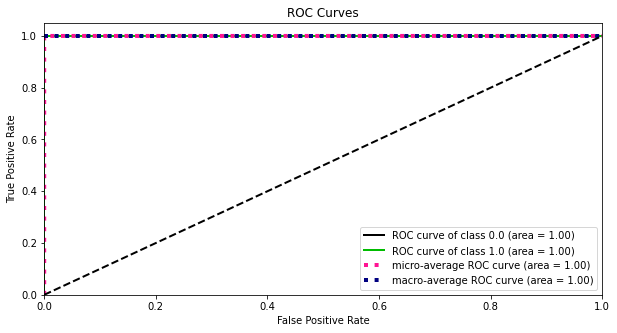

In [96]:
prob = bag_Rn.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Logistic Regression model instantiaing, training and evaluating

In [116]:
bag_Lr = BaggingClassifier(LogisticRegression(), n_estimators = 5, max_samples = 0.5, bootstrap = True,
                          random_state= 3, oob_score = True)

In [117]:
bag_Lr.oob_score

True

In [118]:
bag_Lr.fit(x_train, y_train)
print('Bagging Logostic Regression score ------->', bag_Lr.score(x_test, y_test))

Bagging Logostic Regression score -------> 0.7634325473521454


In [119]:
y_pred = bag_Lr.predict(x_test)

In [120]:
print('-------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      1298
         1.0       0.74      0.80      0.77      1289

    accuracy                           0.76      2587
   macro avg       0.77      0.76      0.76      2587
weighted avg       0.77      0.76      0.76      2587

------------------------------------------------------------



#### Conclusion : Logistic Regression model has 76% score

### Cross Validation score to check if the model is overfitting

In [121]:
cv = cross_val_score(bag_Lr, x, y, cv = 5)
print('Cross Validation score of Logistic regression model --->', cv.mean())

Cross Validation score of Logistic regression model ---> 0.8025001613007291


#### Conclusion : Logistic Regression model has 80% Cross Validation score

### ROC, AUC Curve

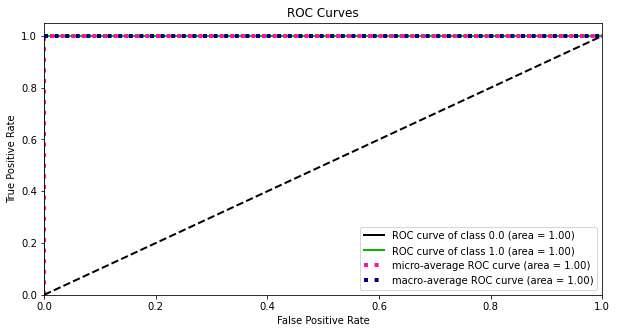

In [122]:
prob = bag_Lr.predict_proba(x_test) # calculating probability
skplt.metrics.plot_roc(y_pred,prob, figsize = (10,5))
plt.show()

### Let's find ROC, AUC score

In [128]:
# DecisionTreeClassifier
roc_auc_score(y_test, bag_dt.predict(x_test))

0.8464618838315436

In [129]:
# XGBoostClassifier
roc_auc_score(y_test, bag_xgb.predict(x_test))

0.861188544529329

In [130]:
# KNeighborsClassifier
roc_auc_score(y_test, bag_Knn.predict(x_test))

0.753136651122871

In [126]:
# RandomForestClassifier
roc_auc_score(y_test, bag_Rn.predict(x_test))

0.8553996660135962

In [127]:
# LogisticRegressionClassifier
roc_auc_score(y_test, bag_Lr.predict(x_test))

0.7635749216136062

### Let's check ROC, AUC Curve for the fitted model

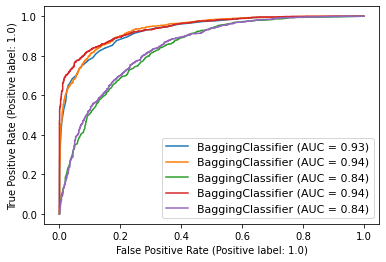

In [131]:
dis = plot_roc_curve(bag_dt, x_test, y_test)
plot_roc_curve(bag_Rn, x_test, y_test, ax = dis.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve(bag_Knn, x_test, y_test, ax = dis.ax_)
plot_roc_curve(bag_xgb, x_test, y_test, ax = dis.ax_)
plot_roc_curve(bag_Lr, x_test, y_test, ax = dis.ax_)
plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

### Looking ROC, AUC Curve we found XGBoost has best model so we do Hyperparameter Tuning on it.

In [132]:
param = {'n_estimators': [50,100,150], 'max_samples': [1.0], 'bootstrap': [True]}

In [133]:
grid_search = GridSearchCV(estimator = bag_xgb, param_grid = param, cv = 5 , n_jobs = -1)

In [134]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=XGBClassifier(base_score=None,
                                                                      booster=None,
                                                                      colsample_bylevel=None,
                                                                      colsample_bynode=None,
                                                                      colsample_bytree=None,
                                                                      eval_metric='mlogloss',
                                                                      gamma=None,
                                                                      gpu_id=None,
                                                                      importance_type='gain',
                                                                      interaction_constraints=None,
                                                                      learnin

In [135]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 50}


In [137]:
hxgb = BaggingClassifier(base_estimator=xgb.XGBClassifier(eval_metric = 'mlogloss'),max_samples = 1.0, bootstrap = True , n_estimators = 50)
hxgb.fit(x_train, y_train)
hxgb.score(x_test, y_test)

0.860456126787785

In [139]:
y_pred = hxgb.predict(x_test)

In [140]:
print('--------------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

--------------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1298
         1.0       0.87      0.85      0.86      1289

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587

------------------------------------------------------------



#### After Hyperparameter Tuning model accuracy score 86%. 

### Saving The Model

In [148]:
# saving the model to the Local file system
filename = 'Customer Churn Analysis.pickle'
pickle.dump(hxgb, open(filename, 'wb'))

### Predict Customer Churn 

In [150]:
model = pickle.load(open('Customer Churn Analysis.pickle', 'rb'))
result = model.score(x_test, y_test)
print('Predicted Score --------->', result)

Predicted Score ---------> 0.860456126787785


In [159]:
Prediction = pd.DataFrame([model.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Orginal'])
Prediction

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

### Saving the predicted result in CSV file

In [160]:
Prediction.to_csv('Customer Churn Analysis Prediction.csv')

## Final Conclusion : XGBoost is our best model.